In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
print(len(pref))
pref.head()

22278


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
0,2020/1/16,1,北海道,0,0,0,0
1,2020/1/17,1,北海道,0,0,0,0
2,2020/1/18,1,北海道,0,0,0,0
3,2020/1/19,1,北海道,0,0,0,0
4,2020/1/20,1,北海道,0,0,0,0


In [3]:
pref["日付"] = pd.to_datetime(pref["日付"] )

In [4]:
all_jp = pref.groupby(["日付"], as_index=False).sum()
del all_jp["都道府県コード"]
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]


In [5]:
all_jp["感染者数移動平均7"] = all_jp["各地の感染者数_1日ごとの発表数"].rolling(7).mean()
all_jp.tail()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,感染者数移動平均7
469,2021-04-29,5899,78,5033.714286
470,2021-04-30,4678,39,4972.571429
471,2021-05-01,5962,83,5025.142857
472,2021-05-02,5880,61,5208.000000
473,2021-05-03,4459,49,5373.714286


In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


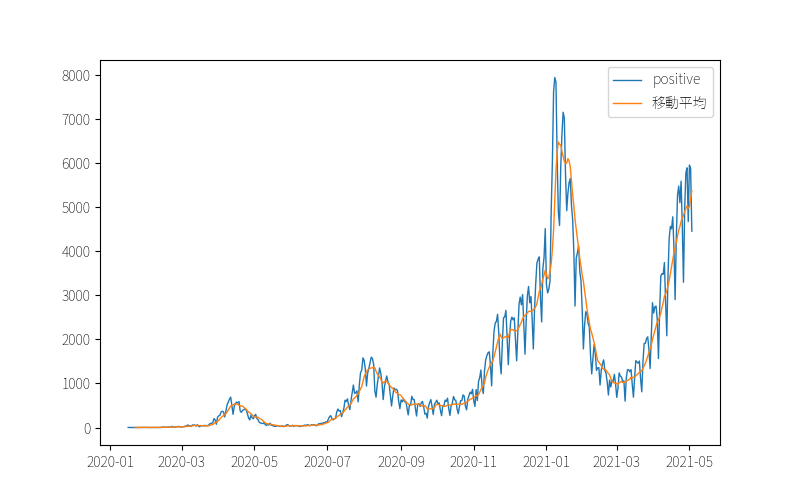

In [7]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.plot_date(all_jp["日付"],all_jp["各地の感染者数_1日ごとの発表数"],label="positive", fmt="-", lw=1.0)
# ax2 = ax1.twinx()
ax1.plot_date(all_jp["日付"],all_jp["感染者数移動平均7"],label="移動平均", fmt="-",lw=1.0)
plt.legend()


## 曜日別陽性者集計

In [8]:
all_jp["weekday"] = all_jp["日付"].dt.weekday
weekdays = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
all_jp = pd.merge(all_jp, weekdays, left_on="weekday", right_index=True, how="left")
all_jp.head()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,感染者数移動平均7,weekday,曜日
0,2020-01-16,1,0,NaN,3,木
1,2020-01-17,0,0,NaN,4,金
2,2020-01-18,0,0,NaN,5,土
3,2020-01-19,0,0,NaN,6,日
4,2020-01-20,0,0,NaN,0,月


## matplotlib のフォント設定

In [9]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/masaru/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'